## First dataset to look at:
* CoNLL 2010 (coreference)
* While waiting for CoNLL 2012
* Available at '/run/user/71447/gvfs/sftp:host=decore0.imag.fr,user=sfeirj/home/getalp/dinarelm/work/data/2010_SemEval'

### Used dataset: development for Spanish
140 documents; 1,419 sentences; 44,460 tokens
Approx 31 words per sentence, 10 sentences per document

In [12]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [13]:
! cd /run/user/71447/gvfs/sftp:host=decore0.imag.fr,user=sfeirj/home/getalp/dinarelm/work/data

#### Every row doesn't have the same number of columns (see documentation).

In [14]:
languages = ["ca", "es", "it", "nl"]
sets = ["devel", "train"]

In [15]:
for l in languages:
    print(l)
    for s in sets:
        print(s)
        try:
            path = "/run/user/71447/gvfs/sftp:host=decore0.imag.fr,user=sfeirj/home/getalp/dinarelm/work/data/2010_SemEval/corpora/training/" + l + "." + s + ".txt"
            data = pd.read_csv(path, delimiter="\t")
        except:
            print("Error in columns size while reading language:", l, "and set:", s)

ca
devel
Error in columns size while reading language: ca and set: devel
train
Error in columns size while reading language: ca and set: train
es
devel
Error in columns size while reading language: es and set: devel
train
Error in columns size while reading language: es and set: train
it
devel
Error in columns size while reading language: it and set: devel
train
Error in columns size while reading language: it and set: train
nl
devel
Error in columns size while reading language: nl and set: devel
train
Error in columns size while reading language: nl and set: train


#### Let's take a closer look at lines lengths

In [16]:
line_lengths = []

with open("../../Data/es.devel.txt", 'r') as f:
    for line in f.readlines():
        first_string = "#begin document CESS-CAST-A_10127_20001013.tbf.xml\n"
        if (line != first_string):
            print(line[:3])
            line_lengths.append(len(line[:-1].split("\t")))

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/es.devel.txt'

In [9]:
lengths_data = pd.DataFrame(line_lengths)

In [10]:
lengths_data.describe()

ValueError: Cannot describe a DataFrame without columns

In [11]:
from collections import Counter

In [53]:
len(Counter(line_lengths).keys())

14

In [44]:
import matplotlib.pyplot as plt

In [59]:
counter_keys = list(Counter(line_lengths).keys())
counter_values = list(Counter(line_lengths).values())

(array([1698.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 4423.,    0., 7852., 9238.,    0., 8523.,
        5417.,    0., 3330., 2382., 1609.,    0.,  522.,  736.,    0.,
         187.,   85.,  156.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ,
        16.4, 17.8, 19.2, 20.6, 22. , 23.4, 24.8, 26.2, 27.6, 29. , 30.4,
        31.8, 33.2, 34.6, 36. , 37.4, 38.8, 40.2, 41.6, 43. ]),
 <a list of 30 Patch objects>)

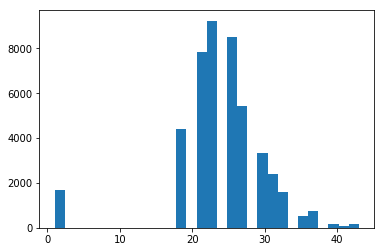

In [66]:
plt.hist(line_lengths, 30)

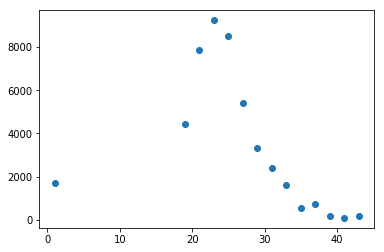

In [63]:
plt.scatter(counter_keys, counter_values)

### Build that dataframe

In [150]:
data = pd.DataFrame()
data_list = []

with open("../../Data/es.devel.txt", 'r') as f:
    iter_readlines = iter(f.readlines())
    #next(iter_readlines) to skip first line
    for line in iter_readlines:
        splitted_line = line[:-1].split("\t")
        useful_splitted_line = splitted_line[:14] + [splitted_line[-1]]
        data_list.append(useful_splitted_line)
        
data = pd.DataFrame(data_list,columns=['col' + str(elem) for elem in range(15)])

In [151]:
#a look without empty rows (separations between sentences)
data[data['col0'] != '']

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,#begin document CESS-CAST-A_10127_20001013.tbf...,#begin document CESS-CAST-A_10127_20001013.tbf...,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1,Rusia,Rusia,Rusia,n,n,postype=proper,postype=proper,2,2,suj,suj,(org),_,(1)
2,2,llegó,llegar,llegar,v,v,postype=main|num=s|person=3|mood=indicative|te...,postype=main|gen=c|num=s|person=3|mood=indicat...,0,0,sentence,sentence,_,_,_
3,3,hoy,hoy,hoy,r,r,_,_,2,2,cc,cc,_,_,_
4,4,a,a,a,s,s,postype=preposition,postype=preposition,2,2,creg,cc,_,_,_
5,5,la,el,el,d,d,postype=article|gen=f|num=s,postype=article|gen=f|num=s,6,6,spec,spec,_,_,(8
6,6,conclusión,conclusión,conclusión,n,n,postype=common|gen=f|num=s,postype=common|gen=f|num=s,4,4,sn,sn,_,_,_
7,7,de,de,de,s,s,postype=preposition,postype=preposition,6,6,sp,sp,_,_,_
8,8,que,que,que,c,p,postype=subordinating,postype=relative|gen=c|num=c,10,10,conj,conj,_,_,_
9,9,no,no,no,r,r,postype=negative,postype=negative,10,10,mod,mod,_,_,_


In [152]:
#a look without useless coreference
data[data['col14'] != "_"]

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,#begin document CESS-CAST-A_10127_20001013.tbf...,#begin document CESS-CAST-A_10127_20001013.tbf...,None,None,None,None,None,None,None,None,None,None,None,None,None
1,1,Rusia,Rusia,Rusia,n,n,postype=proper,postype=proper,2,2,suj,suj,(org),_,(1)
5,5,la,el,el,d,d,postype=article|gen=f|num=s,postype=article|gen=f|num=s,6,6,spec,spec,_,_,(8
14,14,el,el,el,d,d,postype=article|gen=m|num=s,postype=article|gen=m|num=s,15,15,spec,spec,_,_,(3
17,17,submarino,submarino,submarino,n,a,postype=common|gen=m|num=s,postype=qualificative|gen=m|num=s,16,16,sn,sn,(other,_,(4
21,21,"""","""","""",f,f,punct=quotation,punct=quotation,20,20,f,f,other)|other),_,8)|4)|3)
24,24,_,_,_,p,p,_,_,26,26,suj,suj,_,_,(1)
30,30,su,su,su,d,d,postype=possessive|gen=c|num=s|person=3,postype=possessive|gen=c|num=s|person=3,31,31,spec,spec,_,_,(1)|(6
33,33,la,el,el,d,d,postype=article|gen=f|num=s,postype=article|gen=f|num=s,34,34,spec,spec,_,_,(5
36,36,otro,otro,otro,d,d,postype=indefinite|gen=m|num=s,postype=indefinite|gen=m|num=s,37,37,spec,spec,_,_,(39


In [172]:
#count documents
end_indexes = []
put_in = True
for i in range(data.shape[0]):
    if "document CESS-CAST" in data.iloc[i]['col0']:
        if put_in == True:
            end_indexes.append(i)
        put_in = not(put_in)
len(end_indexes)

140

#### Text visualization

In [195]:
#group words by sentences
from itertools import groupby
sentences = list(list(g) for k,g in groupby(list(data['col1']), key=lambda x: x != '') if k)

#add document separations
for s_idx,sentence in enumerate(sentences):
    for w_idx,word in enumerate(sentence):
        if "document CESS" in word:
            sentences[s_idx][w_idx] = "\n"

#print text formatting
print('\n'.join([' '.join(sentence) for sentence in sentences]))


 Rusia llegó hoy a la conclusión de que no hay conclusiones definitivas sobre el naufragio del submarino nuclear " Kursk " , pero _ se aferró sin pruebas a su tesis sobre la colisión con otro buque extranjero .
En un anuncio sorprendente , la comisión que ha investigado las causas del hundimiento del " Kursk " el pasado 12_de_agosto en aguas árticas del mar de Bárents reconoció que " hasta ahora " no se han hallado pruebas de la colisión , pero _ mantuvo abierta la hipótesis .
Iliá_Klebánov , viceprimer ministro y presidente de la comisión gubernamental , anunció sus conclusiones finales tras dos meses de trabajo en_torno_al naufragio y a la muerte de sus 118 tripulantes , la mayor catástrofe en la historia de la Armada rusa .
Pero tras cuatro horas de reunión en la sede de la empresa Rubin , que diseñó el submarino , la principal conclusión de la comisión fue que no hay conclusiones definitivas .
Klebánov dijo en una rueda de prensa que siguen vigentes hasta tres posibles hipótesis :

### Coreference resolution interpretation